In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
results = pickle.load(open( "../HIGH_OUT/SASH_track_2D.p", "rb" ) )

In [3]:
import warnings #dividing by 0 results in an expected user warning
warnings.filterwarnings('ignore')

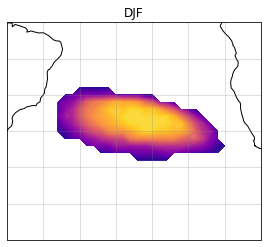

In [4]:
#for index in results:
for index in ['NOAA']:
    #for seas in ['DJF','MAM','JJA','SON']:
    for seas in ['DJF']:
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.contourf(results[index]['JJA'].lon,results[index]['JJA'].lat,results[index][str(seas)].where(results[index][str(seas)]>0),levels=100, cmap = 'plasma',alpha = 0.9,vmin=0, vmax=1,transform = ccrs.PlateCarree())
        ax.coastlines()
        ax.set_extent([-50, 20, -60, 0], ccrs.PlateCarree())
        ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)
        plt.title(str(seas))
        plt.savefig("../HIGH_OUT/contour_plots/pdf/"+str(index)+"_"+str(seas)+".pdf")
        plt.savefig("../HIGH_OUT/contour_plots/png/"+str(index)+"_"+str(seas)+".png",dpi=1000)
        #plt.close()
        plt.show()

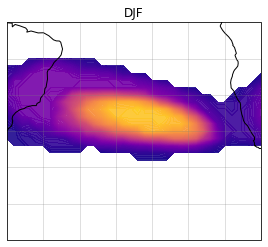

In [5]:
#for index in results:
for index in ['NOAA']:
    mean = (results[index]['DJF'] + results[index]['MAM'] +results[index]['JJA'] + results[index]['SON'])/4
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.contourf(mean.lon,mean.lat,mean.where(mean>0),levels=100, cmap = 'plasma',alpha = 0.9,vmin=0, vmax=1,transform = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-50, 20, -60, 0], ccrs.PlateCarree())
    ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)
    plt.title(str(seas))
    plt.savefig("../HIGH_OUT/annual_contour_plots/pdf/"+str(index)+".pdf")
    plt.savefig("../HIGH_OUT/annual_contour_plots/png/"+str(index)+".png",dpi=1000)
    #plt.close()
    plt.show()

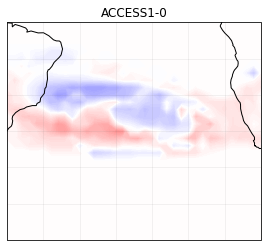

In [6]:
ref = (results['NOAA']['DJF'] + results['NOAA']['MAM'] +results['NOAA']['JJA'] + results["NOAA"]['SON'])/4

#for index in results:
for index in ['ACCESS1-0']:
    mean = (results[index]['DJF'] + results[index]['MAM'] +results[index]['JJA'] + results[index]['SON'])/4
    anom = mean - ref 
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.contourf(anom.lon,anom.lat,anom,levels=100, cmap = 'seismic_r',alpha = 1,vmin=-1, vmax=1,transform = ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-50, 20, -60, 0], ccrs.PlateCarree())
    ax.gridlines(linewidth=0.5, color='gray', alpha=0.2)
    plt.title(str(index))
    plt.savefig("../HIGH_OUT/anom_contour_plots/pdf/"+str(index)+".pdf")
    plt.savefig("../HIGH_OUT/anom_contour_plots/png/"+str(index)+".png",dpi=1000)
    #plt.close()
    plt.show()